In [1]:
import pandas as pd
import numpy as np
from src.utils import load_json
from collections import defaultdict

In [2]:
sp_ops_raw = load_json("../data/sp_ops/known_rxns_swissprot_enzymes_240310.json")
imt_ops = pd.read_csv("../data/sp_ops/JN3604IMT_rules.tsv", sep='\t')
min_ops = pd.read_csv("../data/sp_ops/minimal1224_all_uniprot.tsv", sep='\t')

In [5]:
len(sp_ops_raw), sp_ops_raw['R1b14b079add4f5306e5f50c276a3b0ffae6b7856d3703740c5478c69713b4458']

(20382,
 {'smarts': 'NC(=O)c1ccc[n+](C2OC(COP(=O)(O)OP(=O)(O)OCC3OC(n4cnc5c(N)ncnc54)C(O)C3O)C(O)C2O)c1>>NC(=O)c1cccnc1.Nc1ncnc2c1ncn2C1OC2COP(=O)(O)OP(=O)(O)OCC3OC(OC1C2O)C(O)C3O',
  'imt_rules': [],
  'enzymes': [['A0A009IHW8',
    'MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENARIQSKLSDLQKKKIDIDNKLLKEKQNLIKEEILERKKLEVLTKKQQKDEIEHQKKLKREIDAIKASTQYITDVSISSYNNTIPETEPEYDLFISHASEDKEDFVRPLAETLQQLGVNVWYDEFTLKVGDSLRQKIDSGLRNSKYGTVVLSTDFIKKDWTNYELDGLVAREMNGHKMILPIWHKITKNDVLDYSPNLADKVALNTSVNSIEEIAHQLADVILNR',
    1.0,
    'Evidence at protein level',
    'reviewed',
    'Acinetobacter baumannii (strain 1295743)']],
  'db_entries': [['rhea', 75301], ['rhea', 75300]],
  'reverse': 'R16bcd71a77b7fd97bf2aca7eed3d08cb04719de80c312d055f27074b84bb8e54'})

In [3]:
id2seq = defaultdict(set)
for _, elt in sp_ops_raw.items():
    if elt['imt_rules'] and elt['enzymes']:
        for e in elt['enzymes']:
                id2seq[e[0]].add(e[1])

# Make sure only one seq per id
for k,v in id2seq.items():
     if len(v) > 1:
          print(k,v)

id2rule = defaultdict(set)
for _, elt in sp_ops_raw.items():
    if elt['imt_rules'] and elt['enzymes']:
        for e in elt['enzymes']:
            for r in elt['imt_rules']:
                 id2rule[e[0]].add(r)

print(set(id2rule.keys()) ^ set(id2seq.keys())) # Make sure these are the same

data = {'Entry':[], 'Label':[], 'Sequence':[]}
for id in id2seq.keys():
     data['Entry'].append(id)
     data['Label'].append(";".join(id2rule[id]))
     data['Sequence'].append(list(id2seq[id])[0])

# Save to sp_ops subdir

df = pd.DataFrame(data=data)
df.to_csv("../data/sp_ops/sp_ops.csv", index=False, sep='\t')
df.head()

set()


,Entry,Label,Sequence
0,A1Z1Q3,rule0310_1;rule0007_197;rule0007_198;rule0006_...,MYPSNKKKKVWREEKERLLKMTLEERRKEYLRDYIPLNSILSWKEE...
1,A0A009IHW8,rule0310_1;rule0311_1,MSLEQKKGADIISKILQIQNSIGKTTSPSTLKTKLSEISRKEQENA...
2,A0A024B7W1,rule0010_65;rule0011_51;rule0120_1;rule0121_1,MKNPKKKSGGFRIVNMLKRGVARVSPFGGLKRLPAGLLLGHGPIRM...
3,A0A059TC02,rule0142_1;rule0143_2,MRSVSGQVVCVTGAGGFIASWLVKILLEKGYTVRGTVRNPDDPKNG...
4,A0A061AE05,rule0015_34;rule0014_29,MLTPRDENNEGDAMPMLKKPRYSSLSGQSTNITYQEHTISREERAA...


In [37]:
from src.utils import construct_sparse_adj_mat

y, idx_sample, idx_feature = construct_sparse_adj_mat("sp_ops")

Constructing sp_ops sparse adjacency matrix


In [6]:
y.shape

(3660, 2271)

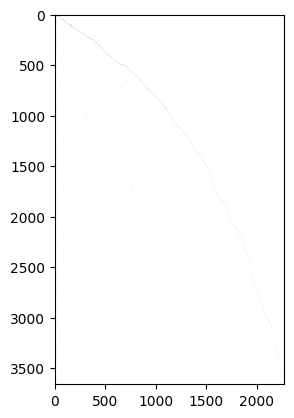

In [41]:
import matplotlib.pyplot as plt

plt.imshow(y.toarray(), cmap='binary')

In [49]:
y.count_nonzero() / (y.shape[0] * y.shape[1])

0.0010321396173660288

# Organize known reactions v2 into ops index csv file and "folded" reactions